# University Certificate in Artificial Intelligence (Hands on AI, Third Challenge, 2022-2023, UMONS)
# Forecasting methods



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [10, 5]
sns.set_theme()

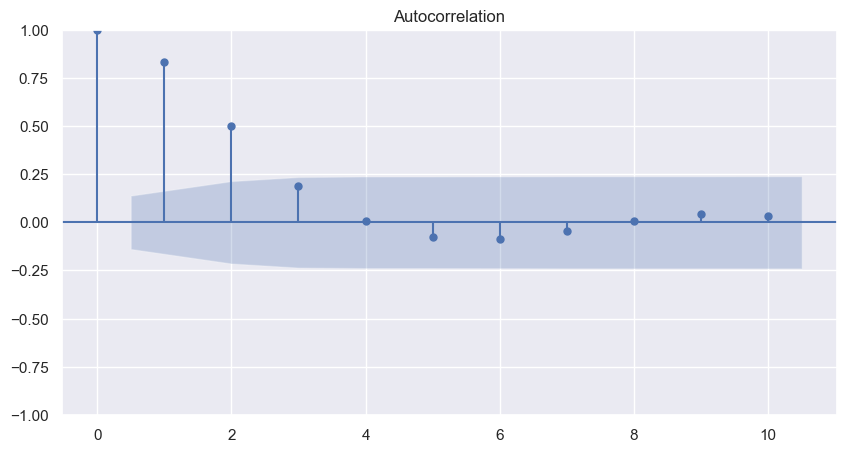

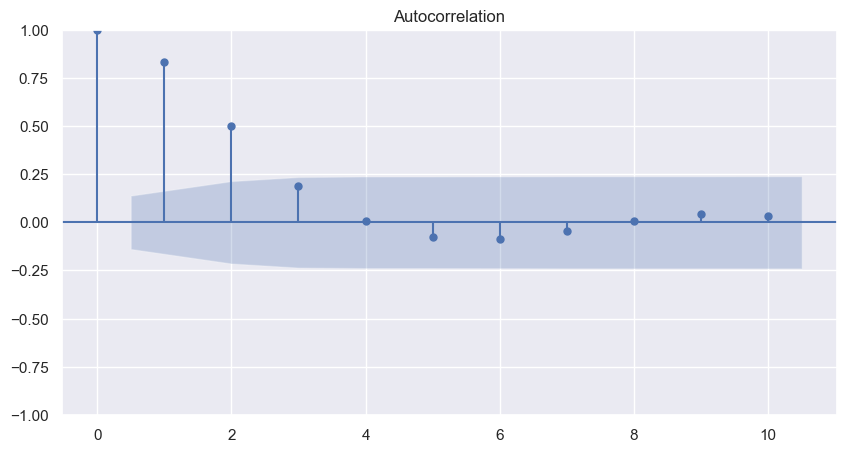

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

# Hint: use plot_acf

###
plot_acf(y, lags=10)

## Real-world time series

In [15]:
# Read the data file
DF = pd.read_csv("../data/public/train.csv", parse_dates=True)
DF["Day"] = pd.to_datetime(DF["Day"], format="%Y-%m-%d")
DF.set_index("Day", inplace=True)
DF = DF.asfreq("D")
DF.fillna(method="backfill", inplace=True)

DF

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s102,s103,s104,s105,s106,s107,s108,s109,s110,s111
Day,,,,,,,,,,,,,,,,,,,,,
1996-03-18,13.407029,11.550454,5.640590,13.180272,9.778912,9.240363,14.937642,2.891156,7.341270,10.289116,...,12.910998,3.670635,14.200680,9.778912,7.695578,8.857710,9.297052,10.416667,11.635488,8.337717
1996-03-19,14.725057,13.591270,14.399093,8.446712,10.813492,11.635488,16.284014,12.358277,9.155329,12.712585,...,15.447846,3.557256,7.128685,11.564626,5.541383,11.380385,12.429138,14.923469,10.586735,9.876381
1996-03-20,20.564059,15.036848,24.418934,19.515306,21.612812,12.103175,16.666667,16.383220,10.586735,14.441610,...,20.372732,4.846939,24.900794,13.803855,16.312358,11.777211,13.251134,25.864512,12.570862,16.320358
1996-03-21,34.708050,21.570295,28.784014,28.883220,38.520408,21.414399,23.568594,30.158730,12.500000,19.401927,...,26.296769,7.086168,26.261338,23.341837,23.951247,18.820862,24.815760,37.996032,17.517007,22.553919
1996-03-22,26.629819,19.444444,20.620748,19.472789,24.744898,24.674036,26.303855,31.179138,7.157029,21.541950,...,33.056973,5.357143,32.893991,23.129252,24.064626,24.305556,19.231859,33.290816,24.291383,18.095739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-03-18,30.087868,18.750000,21.683673,27.054989,25.283447,23.767007,21.414399,17.332766,8.390023,22.874150,...,21.584467,6.746032,23.922902,11.706349,20.053855,20.734127,14.866780,33.276644,16.354875,19.108364
1998-03-19,54.138322,29.676871,21.683673,36.848073,41.723356,30.881519,30.796485,28.996599,12.641723,32.397959,...,33.149093,11.337868,46.428571,21.981293,28.698980,24.829932,29.109977,49.957483,25.070862,25.512888
1998-03-20,53.500567,30.725624,35.586735,29.946145,33.475057,37.074830,40.419501,37.046485,9.892290,30.810658,...,39.725057,7.383787,42.191043,28.968254,35.402494,29.676871,2.777778,43.310658,25.255102,22.027880


In [16]:
# Select the series to consider
id_series_all = ["s001", "s002", "s003"]
DF_all = DF[id_series_all].copy()

DF_all

,s001,s002,s003
Day,,,
1996-03-18,13.407029,11.550454,5.640590
1996-03-19,14.725057,13.591270,14.399093
1996-03-20,20.564059,15.036848,24.418934
1996-03-21,34.708050,21.570295,28.784014
1996-03-22,26.629819,19.444444,20.620748
...,...,...,...
1998-03-18,30.087868,18.750000,21.683673
1998-03-19,54.138322,29.676871,21.683673
1998-03-20,53.500567,30.725624,35.586735


In [17]:
HORIZON = 7 * 2
DF_train = DF_all[:-HORIZON]
DF_test = DF_all[-HORIZON:]

* Use auto.arima to compute forecasts for all series

In [18]:
from pmdarima.arima import auto_arima

fcts_arima_list = list()

for id_series in id_series_all:
    print("======", id_series, "======")
    y = DF_train[id_series]
    model = auto_arima(
        y,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
        D=0,
        start_P=0,
        max_P=2,
        start_Q=0,
        max_Q=0,
        m=7,
        trace=True,
    )
    f_arima = model.predict(HORIZON)
    f_arima.name = id_series
    fcts_arima_list.append(f_arima)

fcts_arima = pd.concat(fcts_arima_list, axis=1)

====== s001 ======
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5602.167, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5074.589, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5386.852, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6962.130, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5405.006, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=5017.239, Time=0.70 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=5110.879, Time=0.75 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=5012.756, Time=1.11 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=5066.968, Time=0.51 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=5013.979, Time=0.80 sec
 ARIMA(1,0,1)(2,0,0)[7]             : AIC=5079.209, Time=0.34 sec

Best model:  ARIMA(1,0,1)(2,0,0)[7] intercept
Total fit time: 4.704 seconds
====== s002 ======
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4683.722, Time=0.02 sec
 ARIMA(

* Compute naive forecasts for all series

In [19]:
fcts_mean_list = list()
fcts_naive_list = list()
fcts_snaive_list = list()

for series in id_series_all:
    series_train = DF_train[series]
    series_test = DF_test[series]

    T = len(series_train)

    ## Mean
    meanf = series_train.mean()
    f_mean = pd.Series([meanf for h in range(0, HORIZON)], index=series_test.index)
    f_mean.name = series

    fcts_mean_list.append(f_mean)

    ## Naive
    f_naive = series_train[-1]
    f_naive = pd.Series([f_naive for h in range(0, HORIZON)], index=series_test.index)
    f_naive.name = series

    fcts_naive_list.append(f_naive)

    ## Seasonal naive
    period = 7
    f_snaive = [series_train[T + h - period * ((HORIZON -1)//period + 1)] for h in range(0, HORIZON) ]
    f_snaive = pd.Series(f_snaive, index=series_test.index)
    f_snaive.name = series

    fcts_snaive_list.append(f_snaive)

In [20]:
fcts_mean = pd.concat(fcts_mean_list, axis=1)
fcts_naive = pd.concat(fcts_naive_list, axis=1)
fcts_snaive = pd.concat(fcts_snaive_list, axis=1)

* Compute the Symmetric Mean Absolute Percentage Error (SMAPE) for all series.

In [21]:
def smape(y_true, y_pred):
    assert (y_pred >= 0).all().all()
    denominator = (y_true + y_pred) / 200.0
    SAPE = np.abs(y_true - y_pred) / denominator
    SAPE[denominator == 0] = 0.0
    return SAPE.mean().mean()


print(smape(DF_test, fcts_mean))
print(smape(DF_test, fcts_naive))
print(smape(DF_test, fcts_snaive))
print(smape(DF_test, fcts_arima))

31.48277807523365
75.95750732082878
23.45589205366527
22.49079256652948


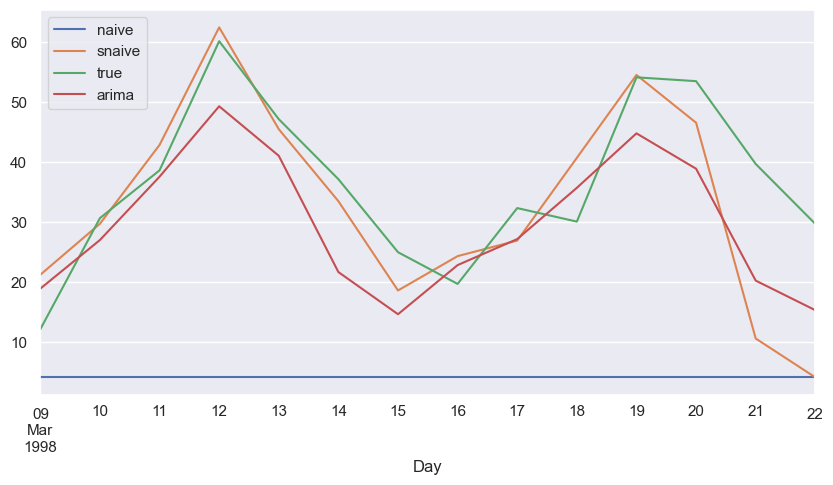

In [22]:
id_series = "s001"
fcts_naive[id_series].plot(label="naive")
fcts_snaive[id_series].plot(label="snaive")
DF_test[id_series].plot(label="true")
fcts_arima[id_series].plot(label="arima")
plt.legend()

# Neural network forecast

In the following, we will consider two neural network architectures for forecasting. Your task is to play with all the hyperparameters to obtain the best out-of-sample forecasts, i.e. on the test set.

Some important hyperparameters include: n_simul (size of the dataset), LAG (the number of lagged values), LATENT_DIM (the number of units in the layer), BATCH_SIZE (number of samples per mini-batch), EPOCHS (the number of epochs), the optimizer and the early stop strategy.

In [23]:
from pmdarima.arima import auto_arima
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

from main.utils.utils_methods import embed_data, plot_learning_curves
from main.utils.utils import mse, mae, mape, smape

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'keras'

* We will simulate a time series from a nonlinear stochastic process:


In [ ]:
n_simul = 1000
n_burn = 100
n = n_simul + n_burn
noise = np.random.normal(size=n)

y = np.zeros(n)
y[0] = 0
y[1] = 0
for t in range(2, n):
    y[t] = (
        0.3 * y[t - 1]
        + 0.6 * y[t - 2]
        + (0.1 - 0.9 * y[t - 1] + 0.8 * y[t - 2]) * (1 / (1 + np.exp(-10 * y[t - 1])))
        + noise[t]
    )

data = pd.DataFrame(y[n_burn:], columns=["series"])
plt.plot(data)

Choose which loss function you want to experiment with. It is used later in the code to fit and evaluate a neural network model.

In [ ]:
# Loss function to be used to optimize the model parameters
loss_fct = "mse"  # 'mae'

# Accuracy measure to be used to evaluate test predictions.
accuracy_measure = mse  # mae # mape # smape

In [ ]:
# The forecast horizon
HORIZON = 3

# The number of lagged values.
LAG = 4

# Data split
n = len(data)
n_train = int(0.6 * n)
n_valid = int(0.2 * n)
n_learn = n_train + n_valid

train = data[:n_train]
valid = data[n_train:n_learn]
test = data[n_learn:]

# From time series to input-output data (also called time series embedding)
(
    train_inputs,
    valid_inputs,
    test_inputs,
    X_train,
    y_train,
    X_valid,
    y_valid,
    X_test,
    y_test,
) = embed_data(train, valid, test, HORIZON, LAG, freq=None, variable="series")

In [ ]:
display(X_train.head())
display(y_train.head())

# Multioutput MLP

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense

# Simple MLP with 1 hidden layer
def mlp_multioutput(X_train, y_train, X_valid, y_valid, LATENT_DIM, BATCH_SIZE, EPOCHS, LAG, HORIZON, 
                    loss, optimizer, earlystop, best_val, verbose):
  
    model = Sequential()
    model.add(Dense(LATENT_DIM, activation="relu", input_shape=(LAG,)))
    model.add(Dense(HORIZON))
    model.compile(optimizer=optimizer, loss=loss)
    
    history = model.fit(
        X_train,
        y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(X_valid, y_valid),
        callbacks=[earlystop, best_val],
        verbose=verbose
    )
    return model, history

In [ ]:
#########################
file_header = "model_" + "mlp_multioutput"
verbose = 0

optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=50)

LATENT_DIM = 5  # 50   # number of units in the RNN layer
BATCH_SIZE = 32  # number of samples per mini-batch
EPOCHS = 200  # maximum number of times the training algorithm will cycle through all samples
loss = loss_fct

best_val = ModelCheckpoint(
    "../work/" + file_header + "_{epoch:02d}.h5",
    save_best_only=True,
    mode="min",
    save_freq="epoch",
    monitor="val_loss",
)
#########################

model_mlp_multioutput, history_mlp_multioutput = mlp_multioutput(
    X_train,
    y_train,
    X_valid,
    y_valid,
    LATENT_DIM=LATENT_DIM,
    BATCH_SIZE=BATCH_SIZE,
    EPOCHS=EPOCHS,
    LAG=LAG,
    HORIZON=HORIZON,
    loss=loss,
    optimizer=optimizer_adam,
    earlystop=earlystop,
    best_val=best_val,
    verbose=verbose,
)

plot_learning_curves(history_mlp_multioutput)

best_epoch = np.argmin(np.array(history_mlp_multioutput.history["val_loss"])) + 1
print("Best epoch:", best_epoch)
filepath = "../work/" + file_header + "_{:02d}.h5"
model_mlp_multioutput.load_weights(filepath.format(best_epoch))

## Recursive MLP


In [ ]:
#########################
file_header = "model_" + "mlp_recursive"
verbose = 0

optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=50)

LATENT_DIM = 5  # number of units in the RNN layer
BATCH_SIZE = 32  # number of samples per mini-batch
EPOCHS = 200  # maximum number of times the training algorithm will cycle through all samples
loss = loss_fct

best_val = ModelCheckpoint(
    "../work/" + file_header + "_{epoch:02d}.h5",
    save_best_only=True,
    mode="min",
    save_freq="epoch",
    monitor="val_loss",
)
#########################

(
    _,
    _,
    _,
    X_train_onestep,
    y_train_onestep,
    X_valid_onestep,
    y_valid_onestep,
    _,
    _,
) = embed_data(train, valid, test, 1, LAG, freq=None, variable="series")

# The recursive MLP is just a multioutput MLP with 1 output.
# However, the predictions given by the multioutput MLP and recursive MLP 
# are not created in the same way.
model_mlp_recursive, history_mlp_recursive = mlp_multioutput(
    X_train_onestep,
    y_train_onestep,
    X_valid_onestep,
    y_valid_onestep,
    LATENT_DIM=LATENT_DIM,
    BATCH_SIZE=BATCH_SIZE,
    EPOCHS=EPOCHS,
    LAG=LAG,
    HORIZON=1,
    loss=loss,
    optimizer=optimizer_adam,
    earlystop=earlystop,
    best_val=best_val,
    verbose=verbose,
)
plot_learning_curves(history_mlp_recursive)

best_epoch = np.argmin(np.array(history_mlp_recursive.history["val_loss"])) + 1
print("Best epoch:", best_epoch)
filepath = "../work/" + file_header + "_{:02d}.h5"
model_mlp_recursive.load_weights(filepath.format(best_epoch))

# Naive forecasts

In [ ]:
# len(X_test.values[:, -1])
predictions_naive = np.tile(X_test.values[:, -1], (HORIZON, 1)).T
predictions_naive = pd.DataFrame(
    predictions_naive, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)
predictions_naive

# MLP forecasts

In [ ]:
predictions_mlp_multioutput = model_mlp_multioutput.predict(X_test)
predictions_mlp_multioutput = pd.DataFrame(
    predictions_mlp_multioutput, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)

predictions_mlp_multioutput

In [ ]:
X_test

In [ ]:
for h in range(HORIZON):
    pred = model_mlp_recursive.predict(X_test)
    # `predictions_mlp_recursive` contains the predictions
    if h == 0:
        predictions_mlp_recursive = pred
    else:
        predictions_mlp_recursive = np.hstack((predictions_mlp_recursive, pred))
    # `X_test` is updated at each step
    X_test = pd.DataFrame(
        np.hstack((X_test.to_numpy()[:, 1:], pred)),
        index=X_test.index,
        columns=X_test.columns,
    )

predictions_mlp_recursive = pd.DataFrame(
    predictions_mlp_recursive, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)

predictions_mlp_recursive

In [ ]:
predictions_combination = (predictions_mlp_multioutput + predictions_mlp_recursive) / 2

# ARIMA forecasts

In [ ]:
test.head()

In [ ]:
print(data[:n_learn])
print(data[n_learn:])

In [ ]:
model = auto_arima(data[:n_learn])
fcts_list = []
for i in np.arange(len(y_test)):
    pred = model.fit_predict(data[LAG + i : n_learn + LAG + i], n_periods=HORIZON)
    fcts_list.append(pred.to_numpy()[np.newaxis])

predictions_arima = pd.DataFrame(
    np.concatenate(fcts_list), columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)

# Forecast accuracy

In [ ]:
true_values = pd.DataFrame(
    test_inputs["target"], columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)

predictions = {
    'naive': predictions_naive,
    'mlp_multioutput': predictions_mlp_multioutput,
    'mlp_recursive': predictions_mlp_recursive,
    'combination': predictions_combination,
    'arima': predictions_arima,
}

results = {}
for model_name, prediction in predictions.items():
    results[model_name] = []
    for h in range(1, HORIZON + 1):
        time_horizon = "t+" + str(h)
        results[model_name].append(
            accuracy_measure(true_values[time_horizon], prediction[time_horizon])
        )

pd.DataFrame(results).mean().to_frame()